In [203]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [204]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_columns',500)

In [205]:
data = pd.read_csv("C:\\Users\\Asus\\Downloads\\tabular-minicap-1-main\\tabular-minicap-1-main\\train.csv")

In [206]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,76466,Sales & Marketing,region_31,Bachelor's,f,other,1,34,3.0,7,0,0,52,0
1,46459,Technology,region_2,Bachelor's,f,other,1,50,3.0,19,0,0,76,0
2,11890,Technology,region_7,Bachelor's,m,other,1,40,3.0,7,0,0,79,0
3,76483,Sales & Marketing,region_2,Bachelor's,f,sourcing,1,33,5.0,6,0,0,48,0
4,63365,Procurement,region_17,Bachelor's,f,other,1,34,3.0,8,0,0,67,0


In [207]:
data.sample(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
32637,28693,Analytics,region_2,Bachelor's,m,sourcing,1,45,3.0,14,1,0,85,0
24806,75187,Procurement,region_29,Bachelor's,f,other,1,31,3.0,7,0,0,68,0
14669,49562,Technology,region_16,Bachelor's,m,other,1,33,3.0,3,0,0,77,0
18309,58472,Operations,region_15,Master's & above,m,referred,1,40,3.0,7,0,0,56,0
30383,18501,Operations,region_22,Master's & above,f,other,2,32,4.0,5,1,0,60,0
32843,36304,Finance,region_1,Master's & above,m,other,1,32,3.0,7,1,0,59,0
41179,62230,Operations,region_7,Bachelor's,m,sourcing,1,38,4.0,5,0,0,52,0
1828,75378,Procurement,region_31,Bachelor's,f,other,1,25,1.0,2,0,0,72,0
10909,48828,Analytics,region_22,Bachelor's,f,sourcing,1,28,4.0,3,1,0,82,0
38666,27467,Sales & Marketing,region_29,Bachelor's,m,other,1,37,3.0,7,0,0,48,0


In [208]:
# to chack shape
data.shape

(43846, 14)

In [209]:
# To check columns
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [210]:
data['employee_id'].value_counts().sum() # same to ourr total number of rows

43846

In [211]:
# check missing values because sklearn don't allow feature with missing values

data.isnull().sum() , data.isnull().mean()*1000

(employee_id                0
 department                 0
 region                     0
 education               1941
 gender                     0
 recruitment_channel        0
 no_of_trainings            0
 age                        0
 previous_year_rating    3325
 length_of_service          0
 KPIs_met >80%              0
 awards_won?                0
 avg_training_score         0
 is_promoted                0
 dtype: int64,
 employee_id              0.000000
 department               0.000000
 region                   0.000000
 education               44.268576
 gender                   0.000000
 recruitment_channel      0.000000
 no_of_trainings          0.000000
 age                      0.000000
 previous_year_rating    75.833599
 length_of_service        0.000000
 KPIs_met >80%            0.000000
 awards_won?              0.000000
 avg_training_score       0.000000
 is_promoted              0.000000
 dtype: float64)

In [212]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [213]:
# To check rows are duplicated or not

data.duplicated().value_counts()

False    43846
dtype: int64

## Initial observations- 1. data have both continuous and categorical columns.
####                       2. 'employee_id' column has all unique values so for further processing we can drop that column
####                       3. No red flags in data set
####                       4. We have target Column = "is_promoted" categorical feature
####                       5. Data have missing values:-
####                                     I. " education" column has 44% missing values (We can fill this missing values in preprocessing)
####                                     II. "previous_year_rating" column has 75% missing values (We can drop this column but after checking                                                            relationship between this column and target column.
####                        6. data types accurately read.
####                        7. Because of having caterorical columns we have to convet into continuous features because of sklearn.
####                        8. Data have 82 duplicated rows we need to remove that rows
####                        9. change column name of Kpi>80% and award_won? because having special charcter


# We have to solve classification problem

In [214]:
column_mapping = {'KPIs_met >80%':'is_kpi_greaterthen_80' , 'awards_won?' : 'is_award_won'}

In [215]:
data = data.rename(columns = column_mapping)

In [216]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,is_kpi_greaterthen_80,is_award_won,avg_training_score,is_promoted
0,76466,Sales & Marketing,region_31,Bachelor's,f,other,1,34,3.0,7,0,0,52,0
1,46459,Technology,region_2,Bachelor's,f,other,1,50,3.0,19,0,0,76,0
2,11890,Technology,region_7,Bachelor's,m,other,1,40,3.0,7,0,0,79,0
3,76483,Sales & Marketing,region_2,Bachelor's,f,sourcing,1,33,5.0,6,0,0,48,0
4,63365,Procurement,region_17,Bachelor's,f,other,1,34,3.0,8,0,0,67,0


## ----------------------------------------------------------------------------------------------------------------------------

# Univariate Analysis

In [217]:
# !. On Continuous features or numerical columns

numerical_cols = data.select_dtypes(include=['int','float']).columns



In [218]:
numerical_cols

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'is_kpi_greaterthen_80', 'is_award_won',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [219]:
# as we seen in initial observation employee_id column all unique values so we drop that feature before going to further EDA

data.drop(['employee_id'],axis=1,inplace=True)

In [220]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,is_kpi_greaterthen_80,is_award_won,avg_training_score,is_promoted
0,Sales & Marketing,region_31,Bachelor's,f,other,1,34,3.0,7,0,0,52,0
1,Technology,region_2,Bachelor's,f,other,1,50,3.0,19,0,0,76,0
2,Technology,region_7,Bachelor's,m,other,1,40,3.0,7,0,0,79,0
3,Sales & Marketing,region_2,Bachelor's,f,sourcing,1,33,5.0,6,0,0,48,0
4,Procurement,region_17,Bachelor's,f,other,1,34,3.0,8,0,0,67,0


In [83]:
numerical_cols

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

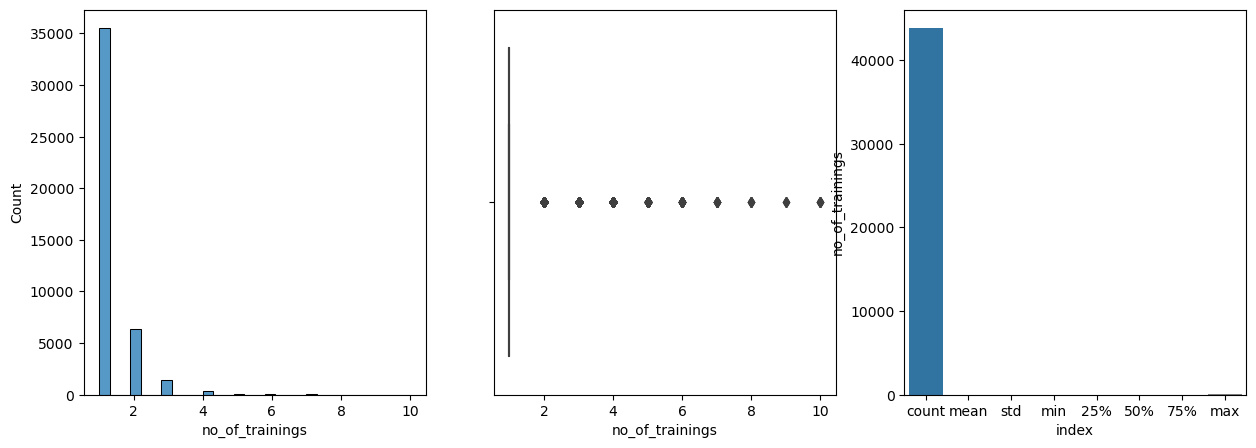

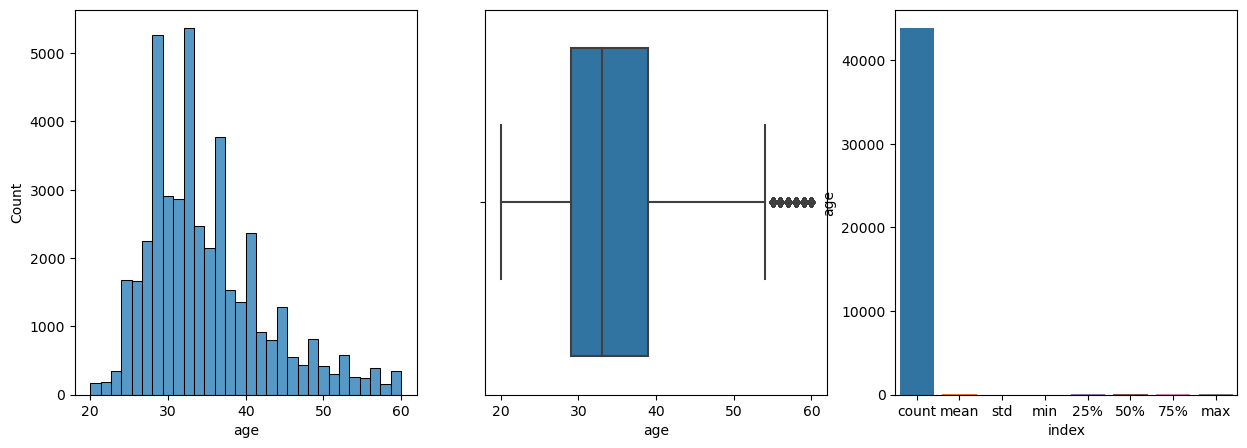

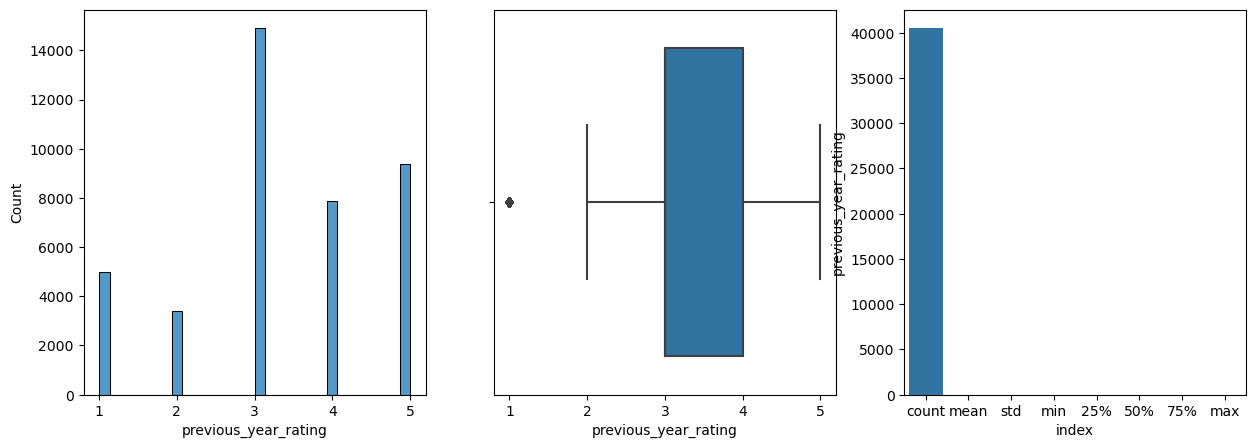

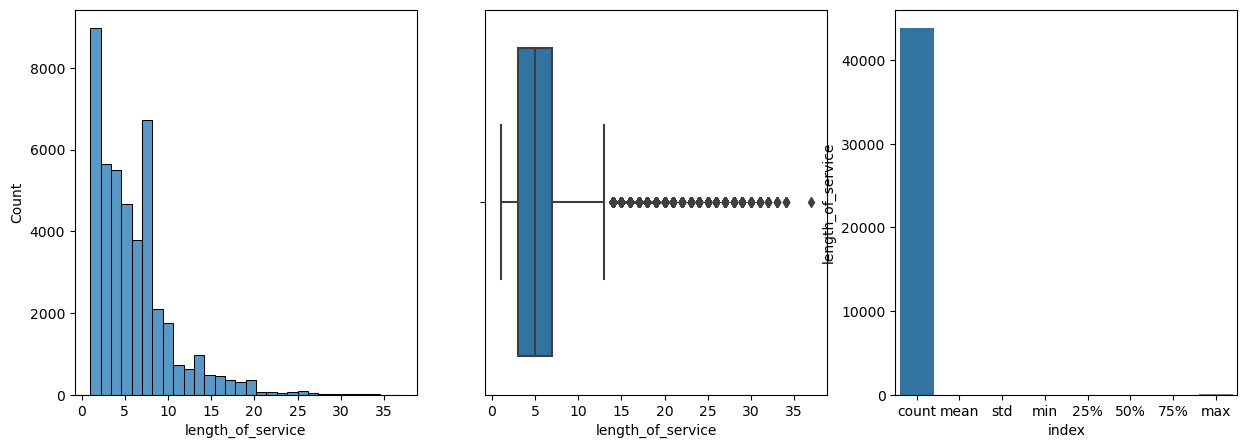

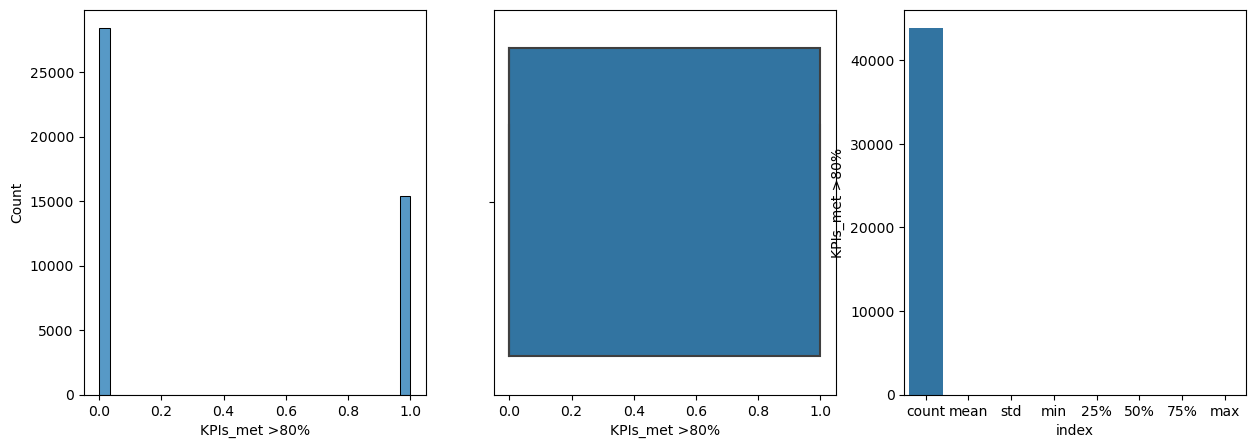

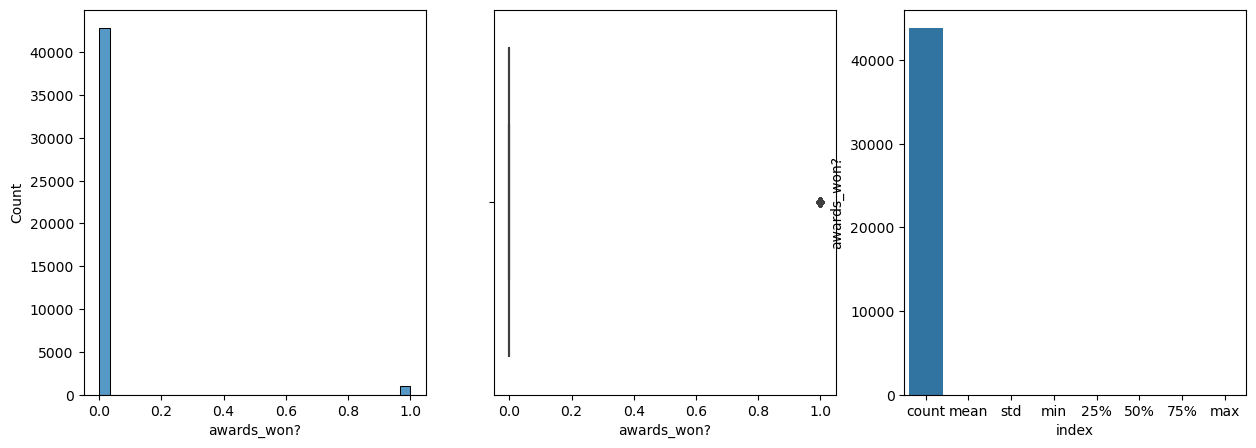

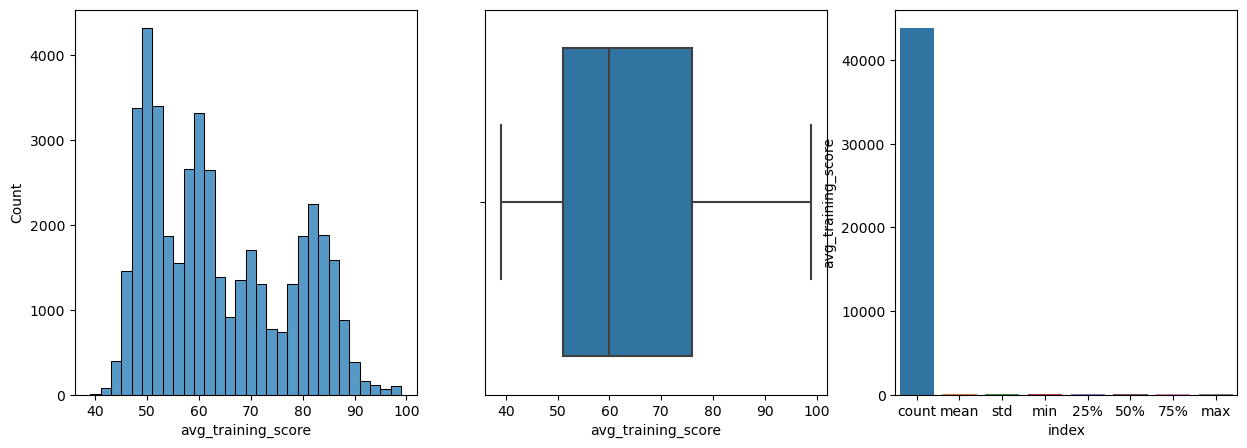

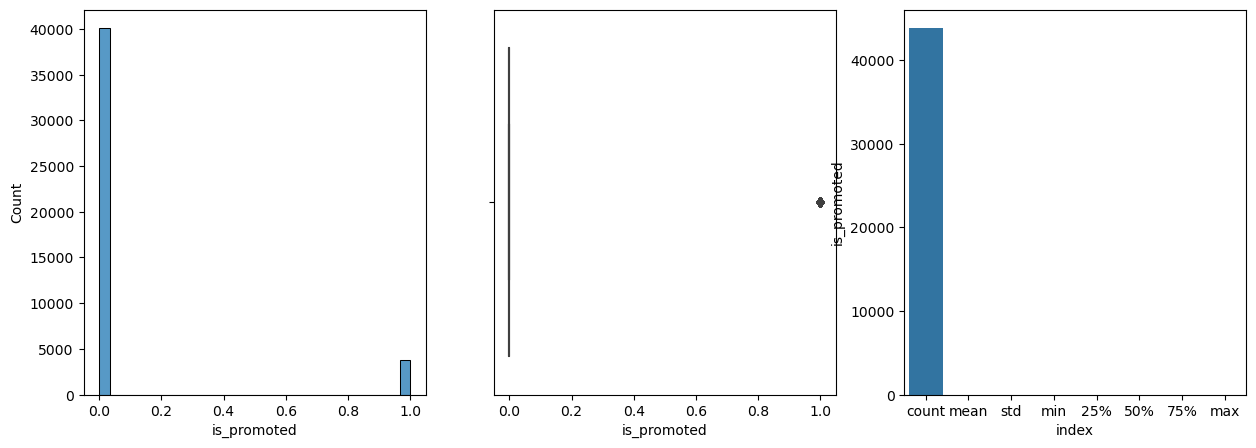

In [84]:
# plotting numerical Columns for analysis

for col in numerical_cols:
    fig,axs=plt.subplots(1,3,figsize=(15,5))
    sns.histplot(data=data, x=col,bins=30,ax=axs[0])
    sns.boxplot(x=data[col],ax=axs[1])
    sns.barplot(data=data[col].describe().reset_index(),x='index',y=col,ax=axs[2])

##  Observation 2 :- From univariate analysis of numerical columns

### Feature 1:- 'no_of_trainings'

####                      We have lots of employees who have completed one training section last year. There are also some employee who                                   has more than 6 to 10 number of training section. Have outliers



### Feature 2:- "age"

####                       We can observe more employee's age in between 30 to 40 years. But some employee's age lies between 55 to 60                                         years. But in problem statement given that they want to promote employee who are in manager position or below.
####                          so we have to ask client that what is maximum age limit for manager position.Before asking check relation        
####                          between age and length_of_service for logical understanding. Have outliers


### Feature 3:- "previous_year_rating"

####                       We can observe that more employee's got previous year rating is near to 3 out of 5
####                        3.0    14912
####                        5.0     9361
####                        4.0     7882
####                        1.0     4983
####                        2.0     3383
####                        This feature also have outliers that less that 1 or near to 1 (we see this in preprocessing)


### Feature 4:- 'length_of_service'

####                     We can observe that more employees have length of service in between 1 to 10 years. But some employees have 
####                     more than 30 years of service. so same here like age column . we have to check these employees are same 
####                      employees that have age more than 50 or 53. Have outliers


### Feature 5:-  "KPIs_met >80%"

####                    This is caterorical column means we have values in 0's and 1's. We can observe more employees have less KPI
####                      means less than 80% for more specific.


### Feature 6:- 'awards_won?'

####                    There are very less number of employees who got award during previous year. 


### Feature 7:- 'avg_training_score'

####                    Average training score lies in between 50 to 80. No outliers.


### Feature 8:- "is_promoted"

####                     This is target column. We can observe this dataset is imbalenced dataset. Because no. of 0's is lot more that no.
####                     of 1's. 

In [145]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,is_kpi_greaterthen_80,is_award_won,avg_training_score,is_promoted
0,Sales & Marketing,region_31,Bachelor's,f,other,1,34,3.0,7,0,0,52,0
1,Technology,region_2,Bachelor's,f,other,1,50,3.0,19,0,0,76,0
2,Technology,region_7,Bachelor's,m,other,1,40,3.0,7,0,0,79,0
3,Sales & Marketing,region_2,Bachelor's,f,sourcing,1,33,5.0,6,0,0,48,0
4,Procurement,region_17,Bachelor's,f,other,1,34,3.0,8,0,0,67,0


In [ ]:
# Because of two columns are naturally categorical we have to convert them from int to object
# 1."is_kpi_greaterthen_80"
# 2. 'is_award_won'
# 3. "is_promoted"
# 4. 'previous_year_rating'

In [146]:
data["is_kpi_greaterthen_80"] = data["is_kpi_greaterthen_80"].astype('object')
data["is_award_won"] = data["is_award_won"].astype('object')
data["is_promoted"] = data["is_promoted"].astype('object')
data['previous_year_rating'] = data['previous_year_rating'].astype('object')

In [147]:
data.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating     object
length_of_service         int64
is_kpi_greaterthen_80    object
is_award_won             object
avg_training_score        int64
is_promoted              object
dtype: object

## ----------------------------------------------------------------------------------------------------------------------------

In [148]:
# plotting categorical_cols


categorical_cols = data.select_dtypes(include=['object']).columns

In [149]:
categorical_cols

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'previous_year_rating', 'is_kpi_greaterthen_80', 'is_award_won',
       'is_promoted'],
      dtype='object')

In [150]:
for col in categorical_cols:
    unique = data[col].unique()
    print(unique)
    

['Sales & Marketing' 'Technology' 'Procurement' 'Operations' 'Legal'
 'Finance' 'Analytics' 'HR' 'R&D']
['region_31' 'region_2' 'region_7' 'region_17' 'region_27' 'region_16'
 'region_29' 'region_8' 'region_22' 'region_10' 'region_14' 'region_4'
 'region_13' 'region_26' 'region_15' 'region_20' 'region_34' 'region_12'
 'region_25' 'region_5' 'region_1' 'region_21' 'region_6' 'region_23'
 'region_33' 'region_28' 'region_11' 'region_19' 'region_9' 'region_3'
 'region_32' 'region_30' 'region_24' 'region_18']
["Bachelor's" 'Below Secondary' nan "Master's & above"]
['f' 'm']
['other' 'sourcing' 'referred']
[3.0 5.0 nan 1.0 4.0 2.0]
[0 1]
[0 1]
[0 1]


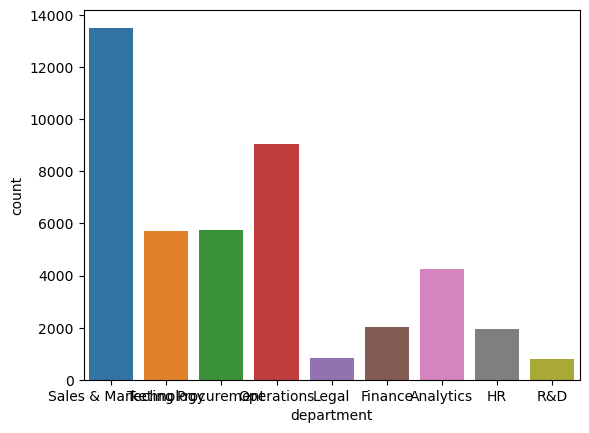

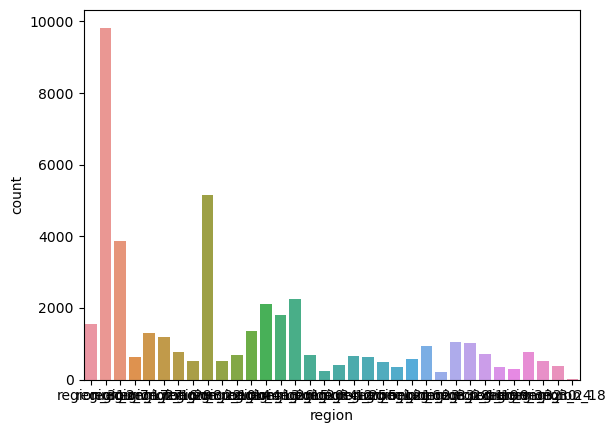

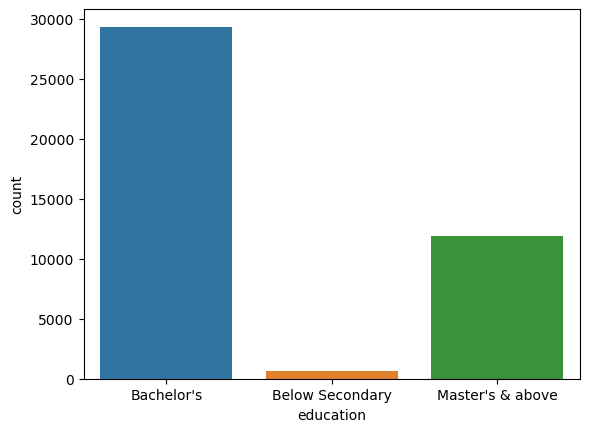

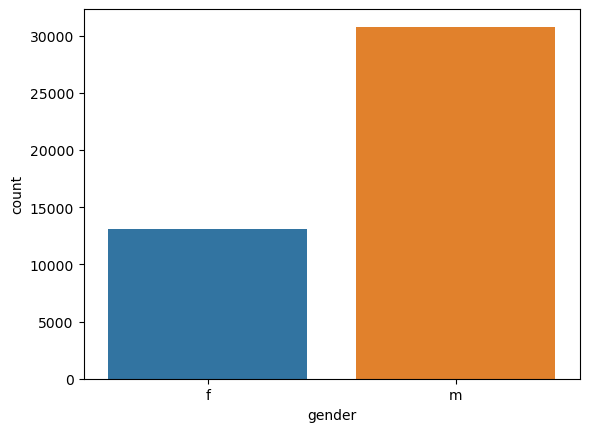

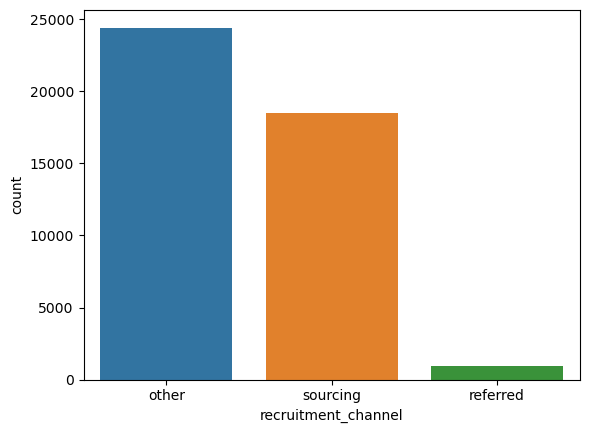

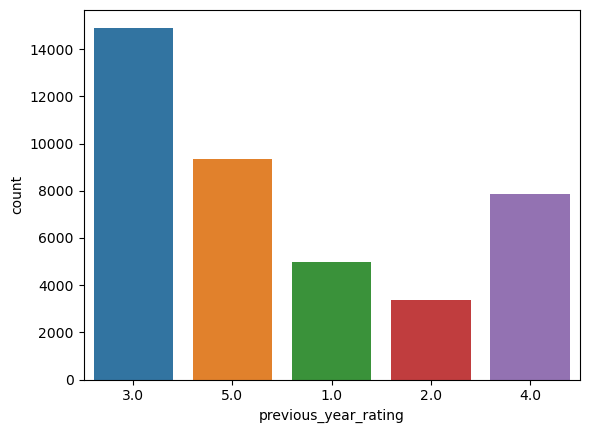

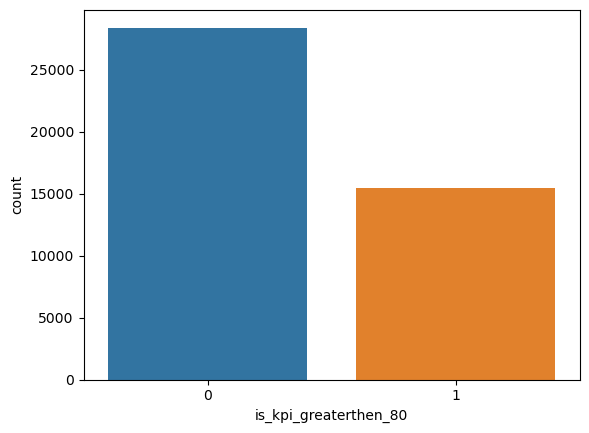

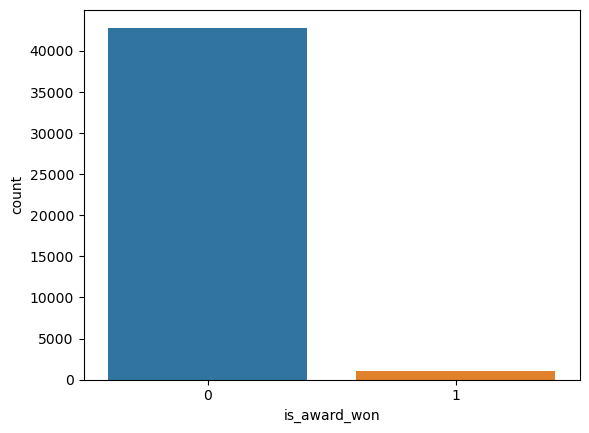

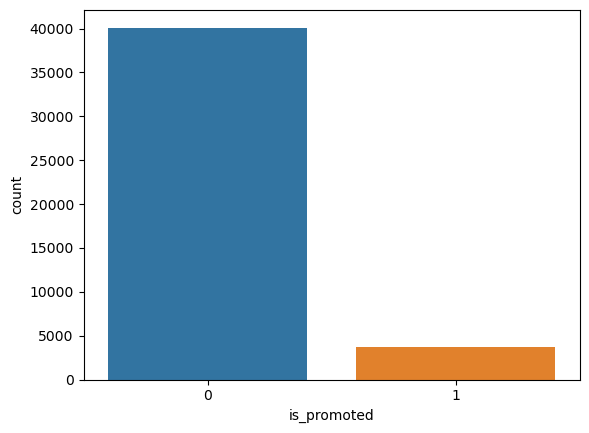

In [151]:
for col in categorical_cols:
    sns.countplot(x=data[col])
    plt.show()
    

In [152]:
for col in categorical_cols:
    vc = data[col].value_counts()
    print(vc)
    

Sales & Marketing    13514
Operations            9041
Procurement           5767
Technology            5716
Analytics             4250
Finance               2008
HR                    1944
Legal                  815
R&D                    791
Name: department, dtype: int64
region_2     9829
region_22    5152
region_7     3861
region_15    2256
region_13    2120
region_26    1794
region_31    1564
region_4     1352
region_27    1292
region_16    1196
region_28    1055
region_11    1028
region_23     944
region_29     783
region_32     760
region_19     708
region_20     690
region_14     679
region_25     665
region_17     644
region_5      620
region_6      561
region_10     530
region_30     517
region_8      514
region_1      478
region_12     403
region_24     391
region_9      345
region_21     342
region_3      289
region_34     238
region_33     221
region_18      25
Name: region, dtype: int64
Bachelor's          29356
Master's & above    11915
Below Secondary       634
Name: edu

## ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Bivariate Analysis

### plotting with target variable
### Our target variable is categorical column

#### 1. categorical vs numerical
####             plot:- barplot , boxplot , distplot 


#### 2. categorical vs categorical
####           plot:- frequency table - pandas crosstab , hratmap(pd.crosstab), To exploit relation - Chisqure test.


#### 3. numerical vs numerical
####           plot:- Scatter plot, corelation 




In [153]:
numerical_cols

Index(['no_of_trainings', 'age', 'length_of_service', 'avg_training_score'], dtype='object')

In [154]:
categorical_cols

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'previous_year_rating', 'is_kpi_greaterthen_80', 'is_award_won',
       'is_promoted'],
      dtype='object')

## 1. categorical vs numerical

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_promoted', ylabel='age'>

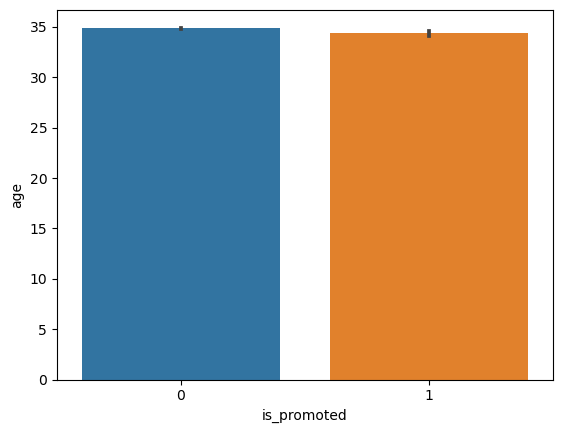

In [96]:
# plotting numerical features with terget feature

sns.barplot(data['is_promoted'],data['age'])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_promoted', ylabel='no_of_trainings'>

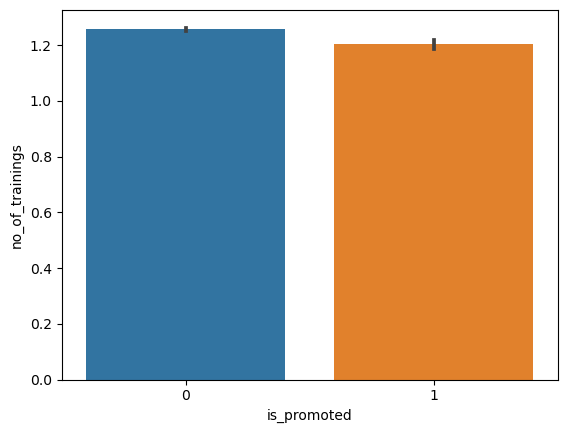

In [97]:
sns.barplot(data['is_promoted'],data['no_of_trainings'])

## categorical vs categorical

is_promoted,0,1
department,,
Analytics,3838,412
Finance,1843,165
HR,1838,106
Legal,776,39
Operations,8246,795
Procurement,5213,554
R&D,740,51
Sales & Marketing,12530,984
Technology,5088,628


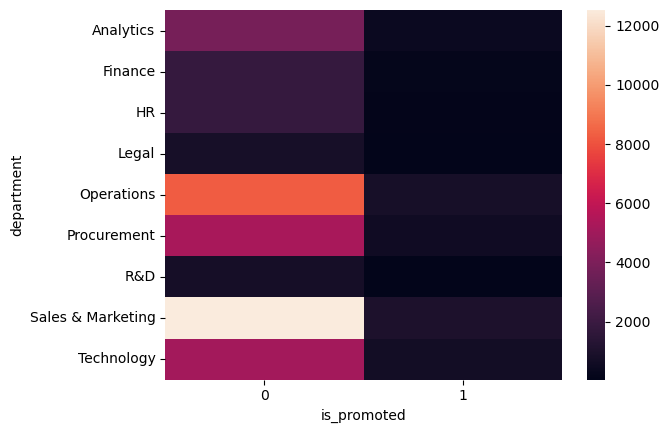

In [98]:

sns.heatmap(pd.crosstab(data['department'],data['is_promoted']))
pd.crosstab(data['department'],data['is_promoted'])

is_promoted,0,1
region,,
region_1,432,46
region_10,493,37
region_11,967,61
region_12,380,23
region_13,1945,175
region_14,631,48
region_15,2076,180
region_16,1113,83
region_17,559,85


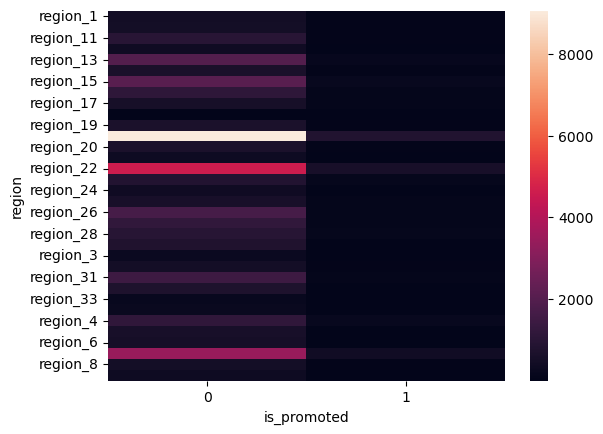

In [99]:
sns.heatmap(pd.crosstab(data['region'],data['is_promoted']))
pd.crosstab(data['region'],data['is_promoted'])

is_promoted,0,1
education,,
Bachelor's,26934,2422
Below Secondary,583,51
Master's & above,10754,1161


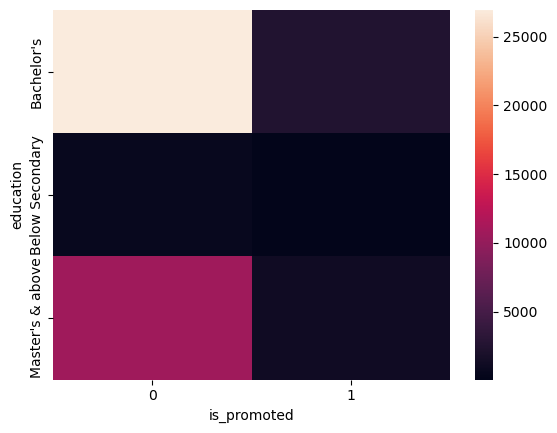

In [100]:
sns.heatmap(pd.crosstab(data['education'],data['is_promoted']))   
pd.crosstab(data['education'],data['is_promoted'])

is_promoted,0,1
recruitment_channel,,
other,22383,2047
referred,811,107
sourcing,16918,1580


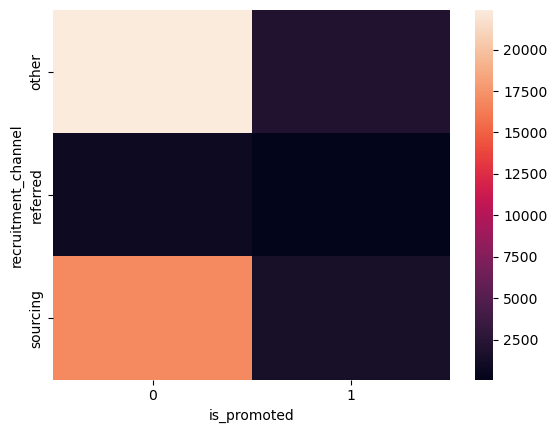

In [101]:
sns.heatmap(pd.crosstab(data['recruitment_channel'],data['is_promoted']))  
pd.crosstab(data['recruitment_channel'],data['is_promoted'])

is_promoted,0,1
previous_year_rating,,
1.0,4912,71
2.0,3236,147
3.0,13837,1075
4.0,7252,630
5.0,7833,1528


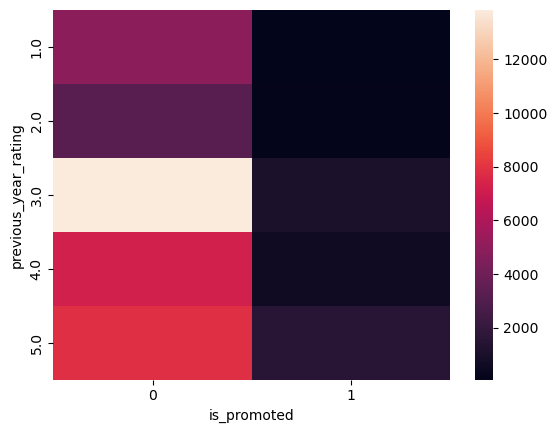

In [102]:
sns.heatmap(pd.crosstab(data['previous_year_rating'],data['is_promoted']))  
pd.crosstab(data['previous_year_rating'],data['is_promoted'])

is_promoted,0,1
is_kpi_greaterthen_80,,
0,27303,1115
1,12809,2619


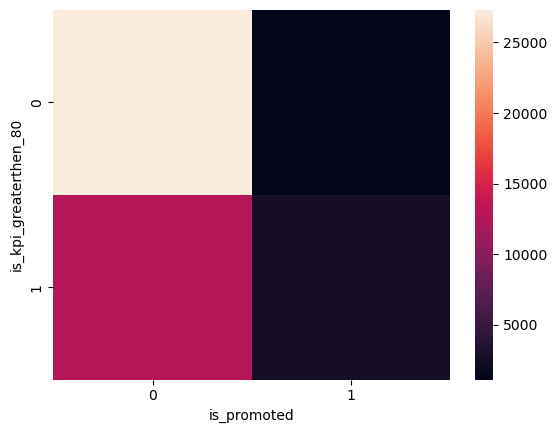

In [156]:
sns.heatmap(pd.crosstab(data['is_kpi_greaterthen_80'],data['is_promoted']))  
pd.crosstab(data['is_kpi_greaterthen_80'],data['is_promoted'])

is_promoted,0,1
is_award_won,,
0,39551,3295
1,561,439


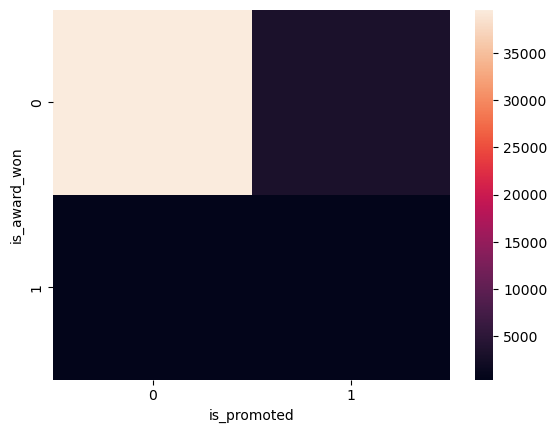

In [158]:
sns.heatmap(pd.crosstab(data['is_award_won'],data['is_promoted']))  
pd.crosstab(data['is_award_won'],data['is_promoted'])

is_promoted,0,1
gender,,
f,11889,1181
m,28223,2553


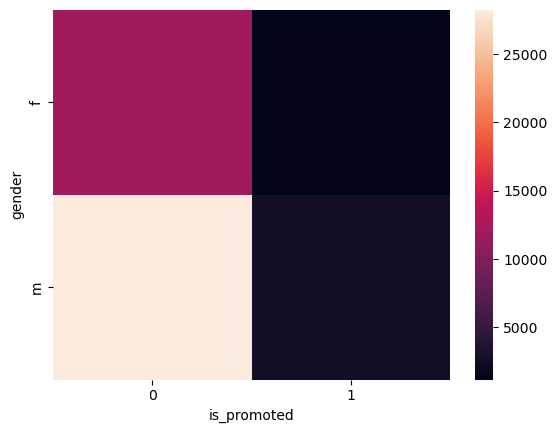

In [105]:
sns.heatmap(pd.crosstab(data['gender'],data['is_promoted']))  
pd.crosstab(data['gender'],data['is_promoted'])

In [106]:
categorical_cols

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted'],
      dtype='object')

### Chisquare test 

#### Ho = null hypothesis - there is  no association between variables
#### Ha = alternative hypothesis - there is association between variables

#### default threshold = 0.05

In [107]:
# Chisquare test :- 
# 1. 'education' vs 'is-promoted'
from bioinfokit.analys import stat
ctab1 = pd.crosstab(data.education,data.is_promoted)

In [108]:
print(ctab1)

is_promoted           0     1
education                    
Bachelor's        26934  2422
Below Secondary     583    51
Master's & above  10754  1161


In [109]:
res1 = stat()
res1.chisq(df=ctab1)
print(res1.summary)


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       24.1918  5.58233e-06
Log-likelihood     2       23.6907  7.17178e-06



####  We reject Ho null hypothesis . we can see here p value is very less than our threshold(0.05) so we can conclude that there is association between education and is_promoted. 

In [110]:
# Frequency table

print(res1.expected_df)


Expected frequency counts

           0          1
--  --------  ---------
 0  26810.2   2545.75
 1    579.02    54.9805
 2  10881.7   1033.27



#### we can observe that actual values and expected values are different hence these two features are dependent

In [111]:
# Chisquare test :- 
# 1. 'department'' vs 'is-promoted'
from bioinfokit.analys import stat
ctab2 = pd.crosstab(data.department,data.is_promoted)

In [112]:
print(ctab2)

is_promoted            0    1
department                   
Analytics           3838  412
Finance             1843  165
HR                  1838  106
Legal                776   39
Operations          8246  795
Procurement         5213  554
R&D                  740   51
Sales & Marketing  12530  984
Technology          5088  628


In [113]:
res2 = stat()
res2.chisq(df=ctab2)
print(res2.summary)


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            8       131.041  1.72087e-24
Log-likelihood     8       134.257  3.70409e-25



####  We reject Ho null hypothesis . we can see here p value is very less than our threshold(0.05) so we can conclude that there is association between department and is_promoted. 

In [114]:
# Frequency table

print(res2.expected_df)


Expected frequency counts

            0          1
--  ---------  ---------
 0   3888.06    361.937
 1   1837       171.005
 2   1778.45    165.554
 3    745.593    69.4068
 4   8271.05    769.947
 5   5275.87    491.128
 6    723.637    67.3629
 7  12363.1    1150.88
 8   5229.22    486.784



#### we can observe that actual values and expected values are different hence these two features are dependent

In [116]:
# region vs is_promoted


from bioinfokit.analys import stat
ctab3 = pd.crosstab(data.region,data.is_promoted)

In [117]:
print(ctab3)

is_promoted     0    1
region                
region_1      432   46
region_10     493   37
region_11     967   61
region_12     380   23
region_13    1945  175
region_14     631   48
region_15    2076  180
region_16    1113   83
region_17     559   85
region_18      24    1
region_19     667   41
region_2     9048  781
region_20     647   43
region_21     328   14
region_22    4561  591
region_23     833  111
region_24     376   15
region_25     579   86
region_26    1688  106
region_27    1199   93
region_28     921  134
region_29     748   35
region_3      255   34
region_30     469   48
region_31    1476   88
region_32     726   34
region_33     213    8
region_34     232    6
region_4     1150  202
region_5      590   30
region_6      530   31
region_7     3446  415
region_8      472   42
region_9      338    7


In [129]:
res3 = stat()
res3.chisq(df=ctab3)
print(res3.summary)


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson           33       408.599  2.52244e-66
Log-likelihood    33       414.6    1.57182e-67



In [119]:
# Frequency table

print(res3.expected_df)


Expected frequency counts

           0          1
--  --------  ---------
 0   437.293   40.7073
 1   484.864   45.1357
 2   940.454   87.5462
 3   368.68    34.3202
 4  1939.46   180.543
 5   621.175   57.8248
 6  2063.88   192.125
 7  1094.15   101.853
 8   589.156   54.8441
 9    22.871    2.12904
10   647.706   60.2945
11  8991.95   837.054
12   631.238   58.7616
13   312.875   29.1253
14  4713.25   438.753
15   863.607   80.3926
16   357.702   33.2982
17   608.367   56.6325
18  1641.22   152.78
19  1181.97   110.029
20   965.154   89.8456
21   716.318   66.6816
22   264.388   24.6117
23   472.971   44.0286
24  1430.81   133.193
25   695.277   64.7229
26   202.179   18.8207
27   217.732   20.2685
28  1236.86   115.139
29   567.2     52.8003
30   513.224   47.7757
31  3532.19   328.809
32   470.227   43.7731
33   315.619   29.3808



#### we reject null hypothesis and these features re dependent

In [124]:
#'recruitment_channel' vs 'is_promoted'

from bioinfokit.analys import stat
ctab4 = pd.crosstab(data.recruitment_channel,data.is_promoted)

In [125]:
print(ctab4)

is_promoted              0     1
recruitment_channel             
other                22383  2047
referred               811   107
sourcing             16918  1580


In [127]:
res4 = stat()
res4.chisq(df=ctab4)
print(res4.summary)


Chi-squared test for independence

Test              Df    Chi-square     P-value
--------------  ----  ------------  ----------
Pearson            2       12.2194  0.0022212
Log-likelihood     2       11.1259  0.00383745



#### We reject null hypothesis

In [123]:
# Frequency table

print(res4.expected_df)


Expected frequency counts

           0          1
--  --------  ---------
 0   437.293   40.7073
 1   484.864   45.1357
 2   940.454   87.5462
 3   368.68    34.3202
 4  1939.46   180.543
 5   621.175   57.8248
 6  2063.88   192.125
 7  1094.15   101.853
 8   589.156   54.8441
 9    22.871    2.12904
10   647.706   60.2945
11  8991.95   837.054
12   631.238   58.7616
13   312.875   29.1253
14  4713.25   438.753
15   863.607   80.3926
16   357.702   33.2982
17   608.367   56.6325
18  1641.22   152.78
19  1181.97   110.029
20   965.154   89.8456
21   716.318   66.6816
22   264.388   24.6117
23   472.971   44.0286
24  1430.81   133.193
25   695.277   64.7229
26   202.179   18.8207
27   217.732   20.2685
28  1236.86   115.139
29   567.2     52.8003
30   513.224   47.7757
31  3532.19   328.809
32   470.227   43.7731
33   315.619   29.3808



In [171]:
#'previous_year_rating' vs 'is_promoted'

from bioinfokit.analys import stat
ctab5 = pd.crosstab(data.previous_year_rating,data.is_promoted)

In [172]:
print(ctab5)

is_promoted               0     1
previous_year_rating             
1.0                    4912    71
2.0                    3236   147
3.0                   13837  1075
4.0                    7252   630
5.0                    7833  1528


In [173]:
res5 = stat()
res5.chisq(df=ctab5)
print(res5.summary)


Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            4       1164.9   6.48969e-251
Log-likelihood     4       1198.32  3.68072e-258



In [136]:
# Frequency table

print(res5.expected_df)


Expected frequency counts

           0         1
--  --------  --------
 0   4558.62   424.381
 1   3094.88   288.116
 2  13642     1269.99
 3   7210.72   671.276
 4   8563.76   797.236



#### we rejetct null hypothesis and these are dependent on each other

In [159]:
#'KPIs_met >80%' vs is_promoted

from bioinfokit.analys import stat
ctab6 = pd.crosstab(data.is_kpi_greaterthen_80 , data.is_promoted)

In [160]:
print(ctab6)

is_promoted                0     1
is_kpi_greaterthen_80             
0                      27303  1115
1                      12809  2619


In [161]:
res6 = stat()
res6.chisq(df=ctab6)
print(res6.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1       2184.79          0
Log-likelihood     1       2072.49          0



In [162]:
# Frequency table

print(res6.expected_df)


Expected frequency counts

          0        1
--  -------  -------
 0  25997.9  2420.13
 1  14114.1  1313.87



#### we reject null hypothesis and these features are dependent

In [163]:
#is_award_won vs is_promoted

from bioinfokit.analys import stat
ctab7 = pd.crosstab(data.is_award_won , data.is_promoted)

In [164]:
print(ctab7)

is_promoted       0     1
is_award_won             
0             39551  3295
1               561   439


In [174]:
res7 = stat()
res7.chisq(df=ctab6)
print(res7.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1       2184.79          0
Log-likelihood     1       2072.49          0



In [166]:
# Frequency table

print(res6.expected_df)


Expected frequency counts

          0        1
--  -------  -------
 0  25997.9  2420.13
 1  14114.1  1313.87



#### we reject null hypothesis and these features are dependent

In [168]:
# 'previous_year_rating' vs 'is_kpi_greaterthen_80'

from bioinfokit.analys import stat
ctab8 = pd.crosstab(data.is_award_won , data.is_promoted)

In [169]:
print(ctab8)

is_promoted       0     1
is_award_won             
0             39551  3295
1               561   439


In [170]:
res8 = stat()
res8.chisq(df=ctab6)
print(res8.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1       2184.79          0
Log-likelihood     1       2072.49          0



In [176]:

from bioinfokit.analys import stat
ctab9 = pd.crosstab(data.gender , data.education)

In [177]:
print(ctab9)

education  Bachelor's  Below Secondary  Master's & above
gender                                                  
f                8685              243              3825
m               20671              391              8090


In [178]:
res9 = stat()
res9.chisq(df=ctab9)
print(res9.summary)


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       44.3191  2.37814e-10
Log-likelihood     2       43.448   3.67602e-10



## ------------------------------------------------------------------------------------------------------------------------------

## Numerical vs numerical

In [179]:
data.corr()

,no_of_trainings,age,length_of_service,avg_training_score
no_of_trainings,1.000000,-0.080378,-0.056051,0.041507
age,-0.080378,1.000000,0.658441,-0.047358
length_of_service,-0.056051,0.658441,1.000000,-0.039113
avg_training_score,0.041507,-0.047358,-0.039113,1.000000


<AxesSubplot:>

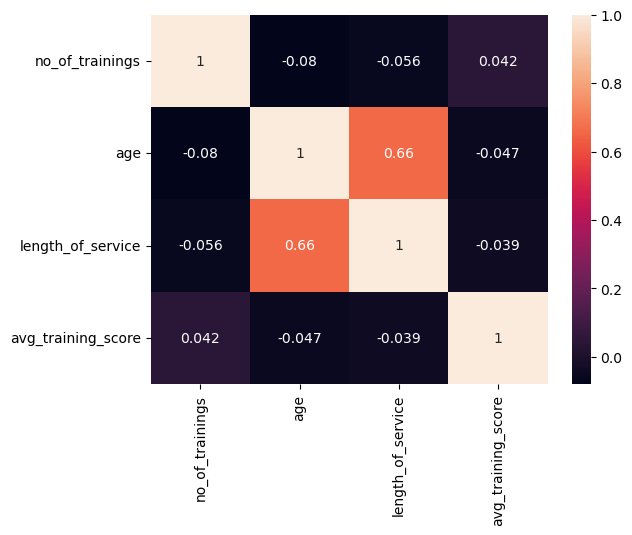

In [181]:
sns.heatmap(data.corr(),annot=True)

In [184]:
numerical_cols

Index(['no_of_trainings', 'age', 'length_of_service', 'avg_training_score'], dtype='object')

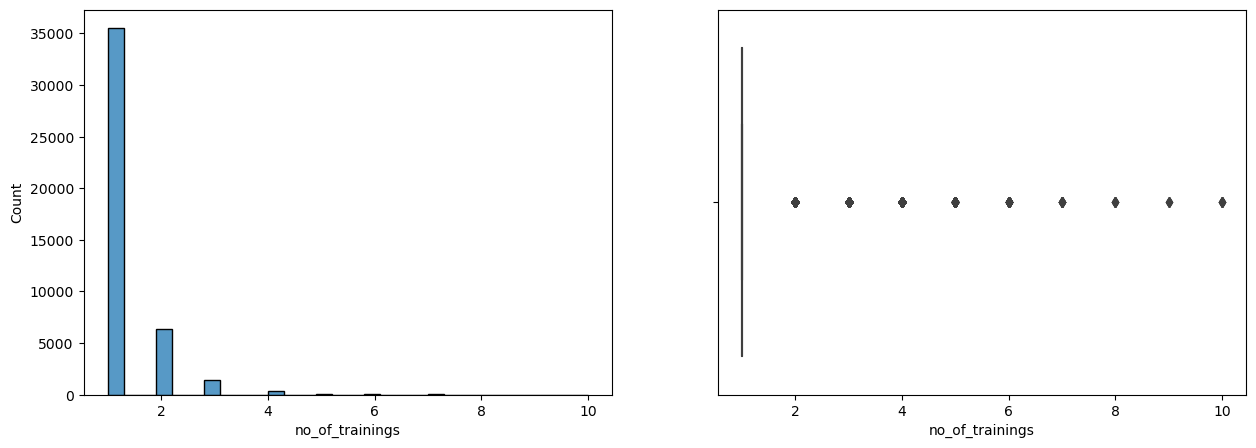

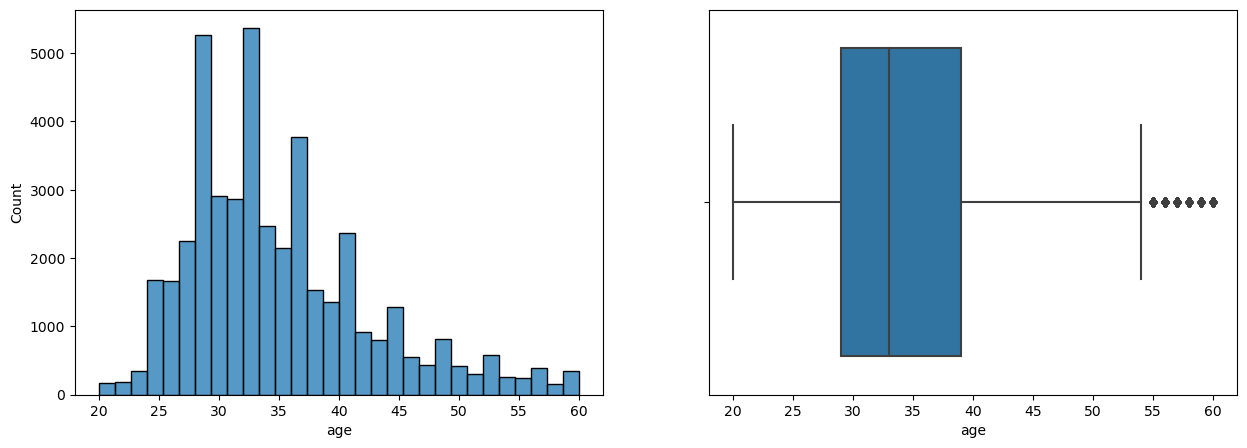

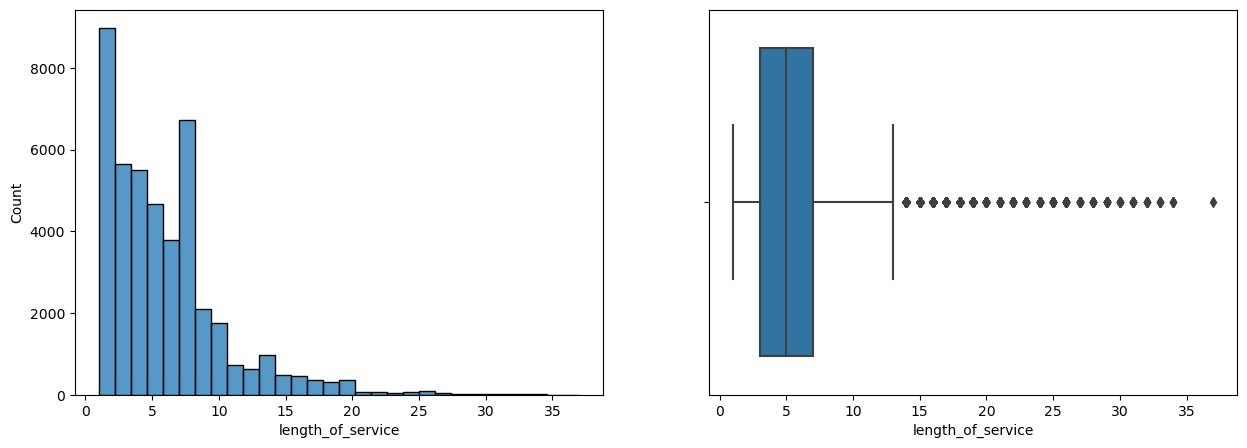

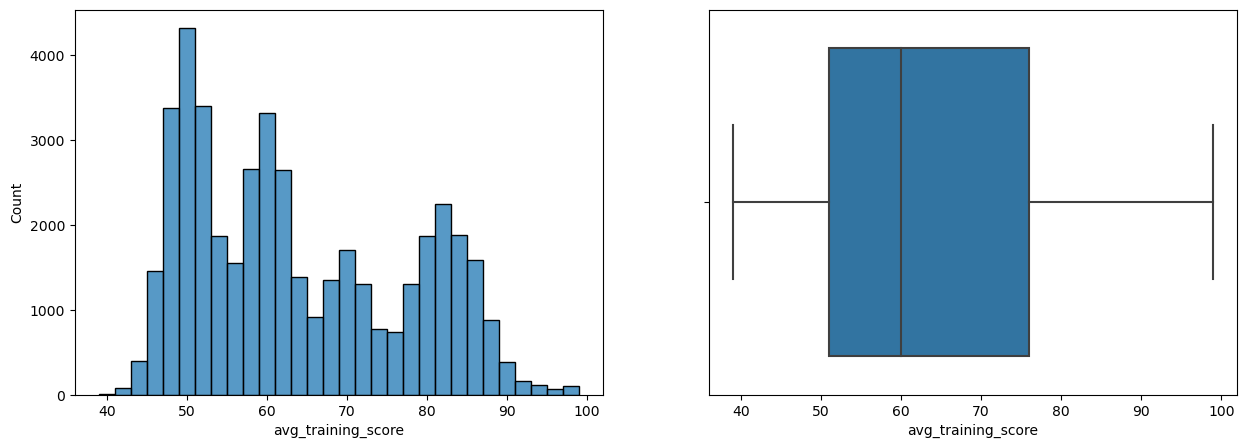

In [197]:
for col in numerical_cols:
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    sns.boxplot(x=data[col],ax=axs[1])
    sns.histplot(data=data,x=col,bins=30,ax=axs[0])
    plt.show()